<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np

import pyAgrum as gum

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

In [2]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))

In [3]:
gum.generateCSV(bn,os.path.join("out","learn.csv"),10000,visible=True,with_labels=True)
print()
gum.generateCSV(bn,os.path.join("out","train.csv"),1000,visible=True,with_labels=True)

 out/learn.csv : [ ########################################################### ] 100%
Log2-Likelihood : -151191.14537352492

 out/train.csv : [ ########################################################### ] 100%
Log2-Likelihood : -15120.851094346603


-15120.851094346603

# Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner=gum.BNLearner(os.path.join("out","train.csv"))

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

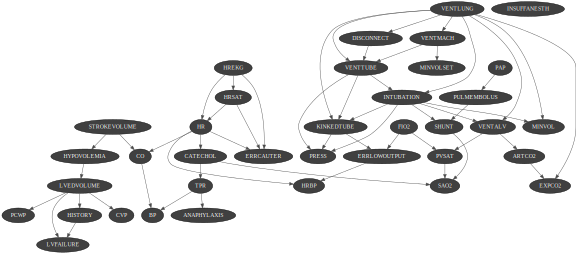

In [5]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8")

In [6]:
print(bn2.names())

['PCWP', 'INTUBATION', 'KINKEDTUBE', 'BP', 'EXPCO2', 'PVSAT', 'VENTLUNG', 'HR', 'CO', 'PULMEMBOLUS', 'TPR', 'HREKG', 'FIO2', 'MINVOLSET', 'VENTTUBE', 'VENTMACH', 'SHUNT', 'LVFAILURE', 'CATECHOL', 'ERRCAUTER', 'ANAPHYLAXIS', 'ERRLOWOUTPUT', 'MINVOL', 'LVEDVOLUME', 'PRESS', 'DISCONNECT', 'HRBP', 'HISTORY', 'PAP', 'HRSAT', 'VENTALV', 'INSUFFANESTH', 'STROKEVOLUME', 'ARTCO2', 'SAO2', 'CVP', 'HYPOVOLEMIA']


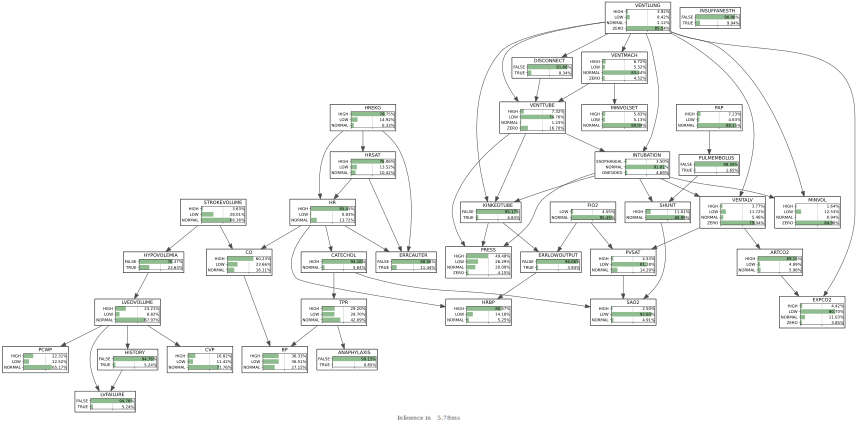

In [7]:
gnb.showInference(bn2,evs={},size="12")

# Two classifiers from the learned BN

In [8]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<HIGH,LOW,NORMAL>
INTUBATION<ESOPHAGEAL,NORMAL,ONESIDED>


(0.9772810961250267, 0.07698742835, 0.9606919537323904, 0.07698742835)

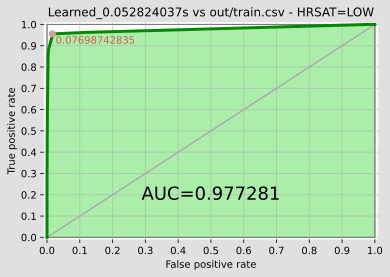

In [9]:
showROC(bn2,os.path.join("out","train.csv"),'HRSAT','LOW',visible=False) 

(0.9996739130434783, 0.3330987033, 0.9999720673273721, 0.0200864789)

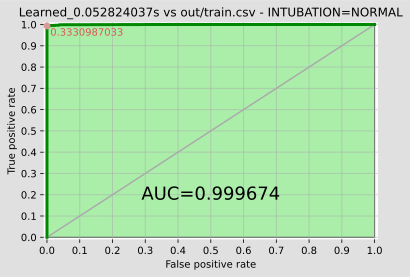

In [10]:
showROC(bn2,os.path.join("out","train.csv"),'INTUBATION',"NORMAL",visible=False) 

(0.9772810961250267, 0.07698742835, 0.9606919537323904, 0.07698742835)

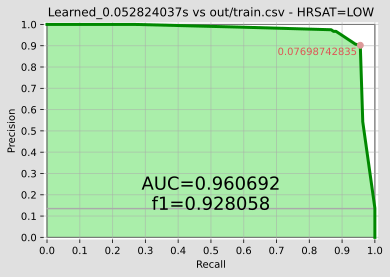

In [11]:
showPR(bn2,os.path.join("out","train.csv"),'HRSAT','LOW',visible=False) 

(0.9993301668493484,
 0.11269045635000001,
 0.9777819089096084,
 0.11269045635000001)

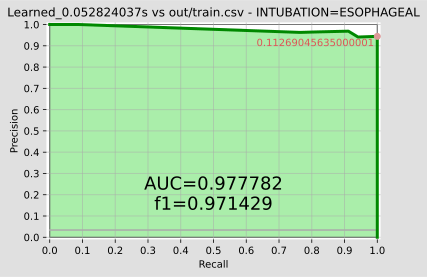

In [12]:
showPR(bn2,os.path.join("out","train.csv"),'INTUBATION',"ESOPHAGEAL",visible=False) 

(0.9772810961250267, 0.07698742835, 0.9606919537323904, 0.07698742835)

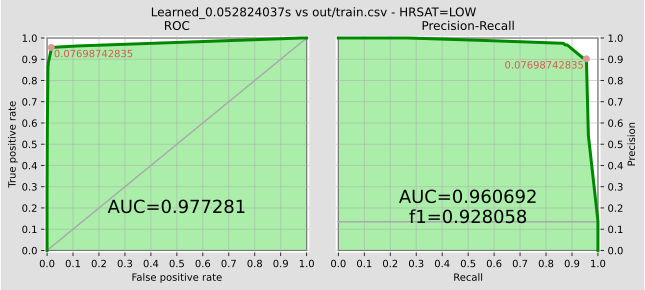

In [13]:
showROC_PR(bn2,os.path.join("out","train.csv"),'HRSAT','LOW',visible=False)

(0.9993301668493484,
 0.11269045635000001,
 0.9777819089096084,
 0.11269045635000001)

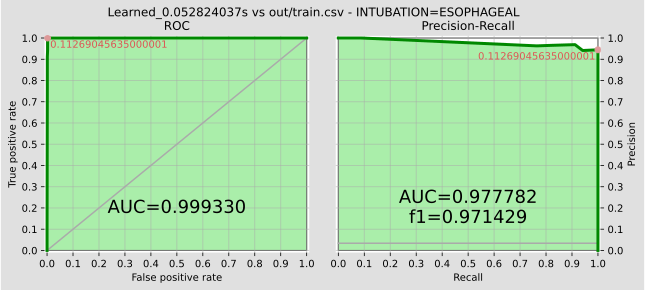

In [14]:
showROC_PR(bn2,os.path.join("out","train.csv"),'INTUBATION',"ESOPHAGEAL",visible=False) 